In [7]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns
sns.set()
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [14]:
plt.rcParams['font.weight']='bold'
plt.rcParams['font.size']=20


In [9]:
df = pd.read_csv('sdn_dataset.csv')
df

,SourceIPaddress,DestinationIPaddress,Ping,PacketSize(Bytes),Average_Delay(secs),Delay(Std.Dev.)(secs),Average_Jitter(secs),Bytes_Received,Average_BitRate(Kbit/s),Average_PacketRate(pkt/s)
0,10.100.200.2,10.100.100.2,Transit,512,0.001737,0.001967,0.001218,674816,360.167094,87.931419
1,10.100.200.2,192.168.3.10,Neighbouring,512,0.001172,0.002156,0.000945,662016,353.113242,86.209288
2,10.100.200.2,192.168.4.10,Neighbouring,512,0.001745,0.002093,0.001096,671744,358.429467,87.507194
3,10.100.200.2,10.0.10.22,Neighbouring,512,0.001457,0.003101,0.001040,668672,356.797447,87.108752
4,10.100.200.2,10.0.10.23,Neighbouring,512,0.001192,0.001711,0.000849,664064,354.329112,86.506131
...,...,...,...,...,...,...,...,...,...,...
502,192.168.1.101,192.168.1.23,NaN,1024,0.000768,0.001091,0.000325,8404992,4485.887155,547.593647
503,192.168.1.101,192.168.1.101,NaN,1024,0.000093,0.000168,0.000051,8519680,4543.826607,554.666334
504,192.168.1.101,192.168.1.22,NaN,1024,0.000396,0.000232,0.000051,40029184,21349.803370,2606.177169
505,192.168.1.101,192.168.1.23,NaN,1024,0.000561,0.000601,0.000091,30201856,16113.314460,1966.957331


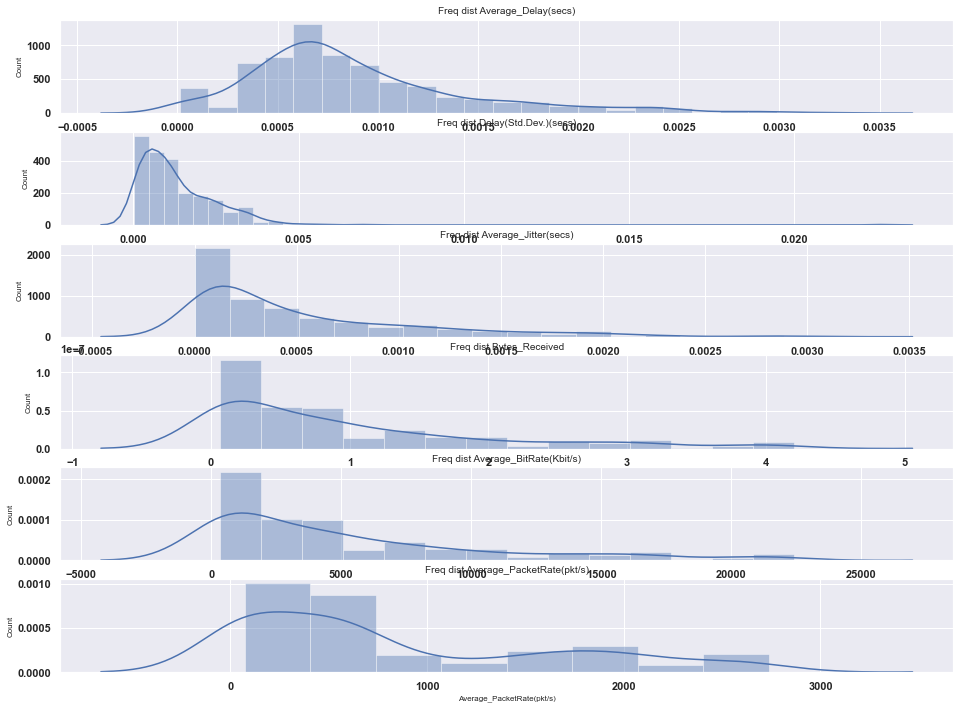

In [5]:
col_names = ['Average_Delay(secs)','Delay(Std.Dev.)(secs)', 'Average_Jitter(secs)', 'Bytes_Received', 'Average_BitRate(Kbit/s)', 'Average_PacketRate(pkt/s)']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

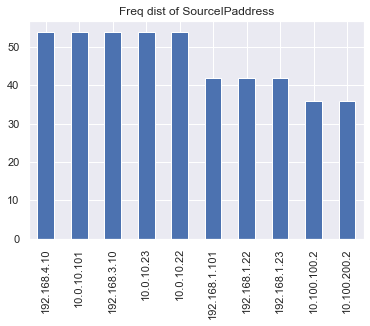

In [37]:
df['SourceIPaddress'].value_counts().plot.bar(title='Freq dist of SourceIPaddress')


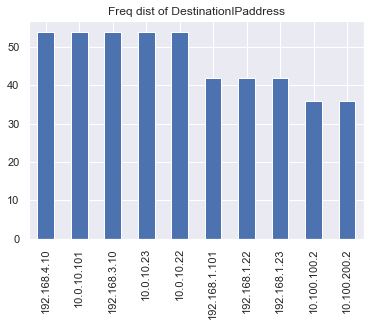

In [39]:
df['DestinationIPaddress'].value_counts().plot.bar(title='Freq dist of DestinationIPaddress')


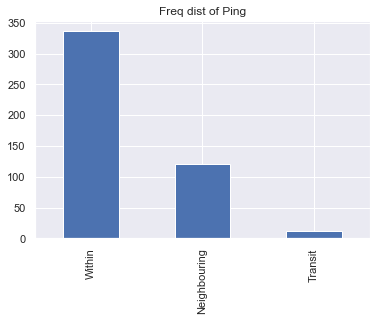

In [38]:
df['Ping'].value_counts().plot.bar(title='Freq dist of Ping')


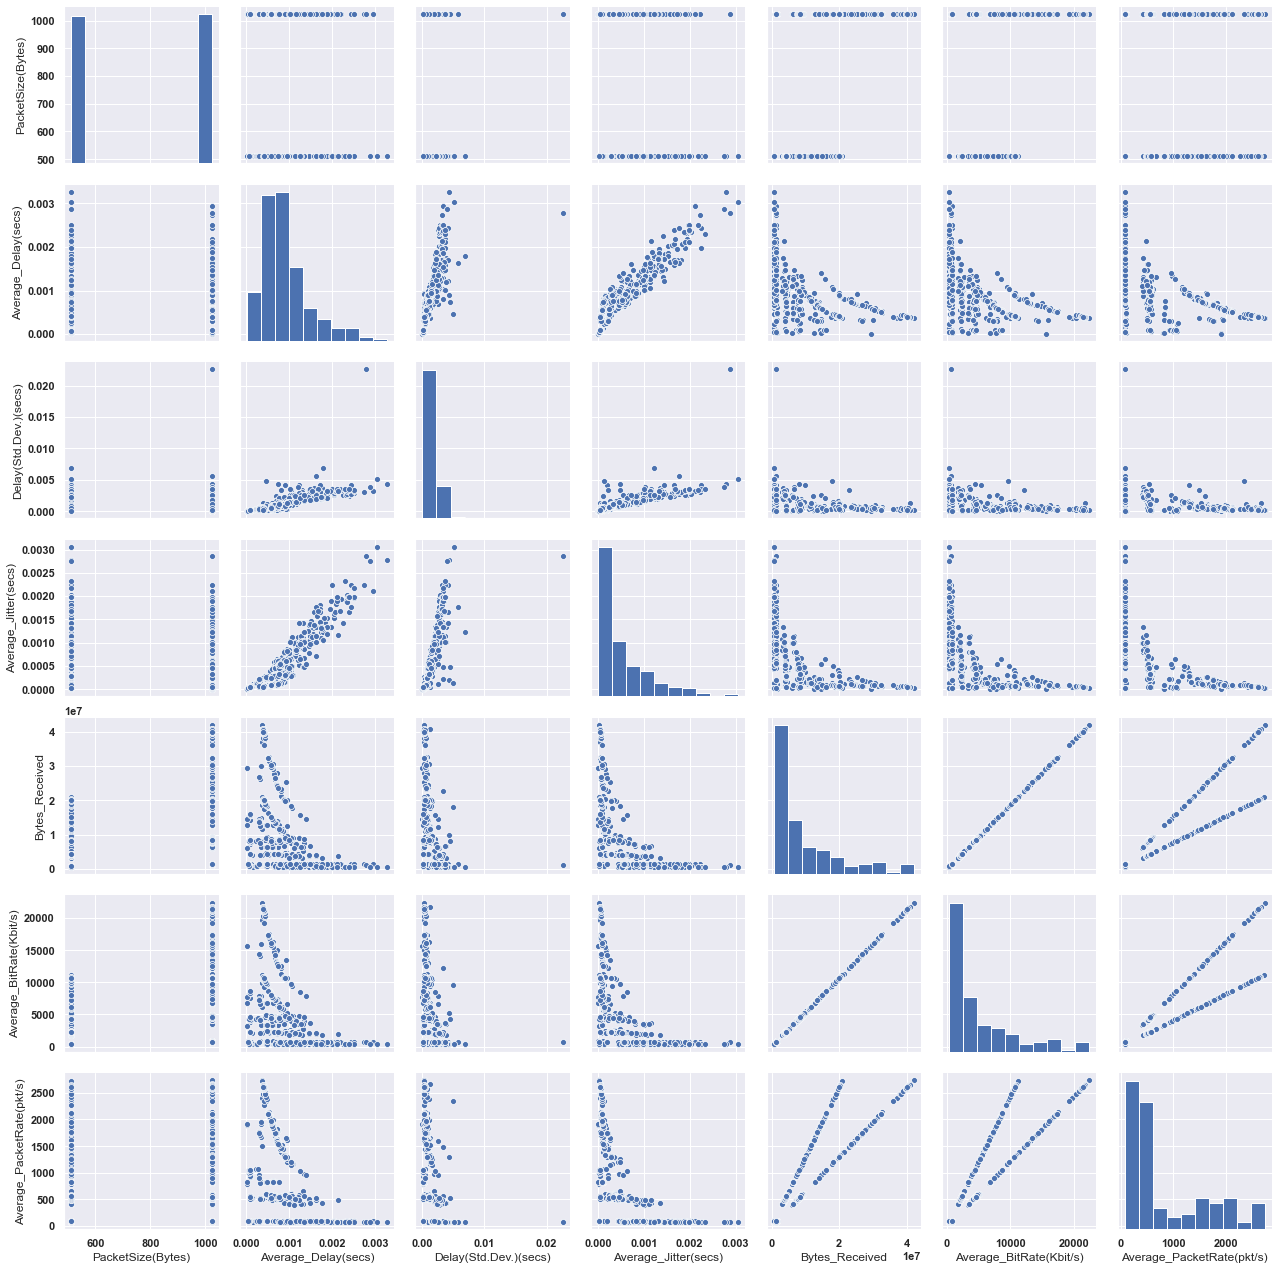

In [23]:
sns.set(font_scale=1)
sns.pairplot(df)

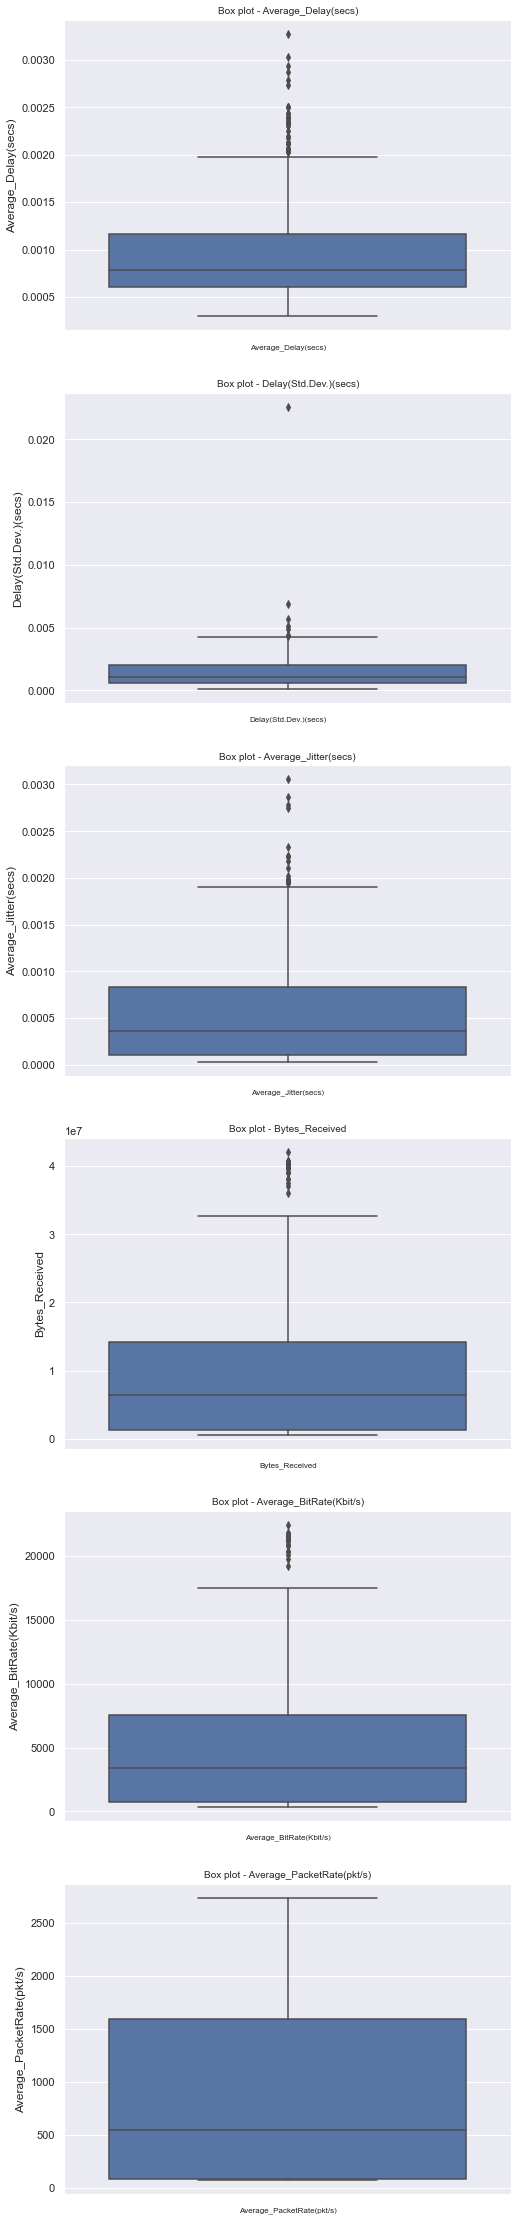

In [35]:
col_names = df.columns.tolist()
col_names = col_names[4:]
fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


In [32]:
df.columns.tolist()

['SourceIPaddress',
 'DestinationIPaddress',
 'Ping',
 'PacketSize(Bytes)',
 'Average_Delay(secs)',
 'Delay(Std.Dev.)(secs)',
 'Average_Jitter(secs)',
 'Bytes_Received',
 'Average_BitRate(Kbit/s)',
 'Average_PacketRate(pkt/s)']

In [5]:
#df = df.astype({"PacketSize(Bytes)": str})
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PacketSize(Bytes),468.0,7.680000e+02,2.562739e+02,512.000000,5.120000e+02,7.680000e+02,1.024000e+03,1.024000e+03
Average_Delay(secs),468.0,9.544594e-04,5.341908e-04,0.000297,6.037500e-04,7.825000e-04,1.167500e-03,3.271000e-03
Delay(Std.Dev.)(secs),468.0,1.429423e-03,1.453720e-03,0.000098,5.690000e-04,1.085000e-03,2.054000e-03,2.258600e-02
Average_Jitter(secs),468.0,5.617585e-04,5.730759e-04,0.000029,1.040000e-04,3.600000e-04,8.312500e-04,3.054000e-03
Bytes_Received,468.0,9.886305e+06,1.052611e+07,608768.000000,1.319936e+06,6.417920e+06,1.419622e+07,4.202394e+07
Average_BitRate(Kbit/s),468.0,5.273464e+03,5.614559e+03,324.353168,7.043208e+02,3.423351e+03,7.574832e+03,2.241303e+04
Average_PacketRate(pkt/s),468.0,8.570785e+02,8.191343e+02,73.756478,8.758426e+01,5.448418e+02,1.595655e+03,2.735966e+03


In [55]:
x = df.copy()
del x['SourceIPaddress']
del x['DestinationIPaddress']
x

,Ping,PacketSize(Bytes),Average_Delay(secs),Delay(Std.Dev.)(secs),Average_Jitter(secs),Bytes_Received,Average_BitRate(Kbit/s),Average_PacketRate(pkt/s)
0,Transit,512,0.001737,0.001967,0.001218,674816,360.167094,87.931419
1,Neighbouring,512,0.001172,0.002156,0.000945,662016,353.113242,86.209288
2,Neighbouring,512,0.001745,0.002093,0.001096,671744,358.429467,87.507194
3,Neighbouring,512,0.001457,0.003101,0.001040,668672,356.797447,87.108752
4,Neighbouring,512,0.001192,0.001711,0.000849,664064,354.329112,86.506131
...,...,...,...,...,...,...,...,...
463,Within,1024,0.001480,0.001806,0.000979,1329152,708.398836,86.474467
464,Within,1024,0.000582,0.000739,0.000249,8175616,4361.107427,532.361746
465,Within,1024,0.000768,0.001091,0.000325,8404992,4485.887155,547.593647
466,Within,1024,0.000396,0.000232,0.000051,40029184,21349.803370,2606.177169


In [20]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x)
enc.categories_

[array(['Neighbouring', 'Transit', 'Within'], dtype=object),
 array([ 512, 1024], dtype=int64),
 array([0.000297, 0.000299, 0.000308, 0.000314, 0.000316, 0.00032 ,
        0.000327, 0.000333, 0.000335, 0.000347, 0.00036 , 0.000363,
        0.000364, 0.000369, 0.00037 , 0.000378, 0.00038 , 0.000385,
        0.000386, 0.000387, 0.000389, 0.00039 , 0.000391, 0.000393,
        0.000396, 0.000398, 0.0004  , 0.000401, 0.000403, 0.000405,
        0.000406, 0.000407, 0.000408, 0.00041 , 0.000414, 0.000422,
        0.000433, 0.000434, 0.000437, 0.000442, 0.000443, 0.000457,
        0.000458, 0.000461, 0.000463, 0.000465, 0.000467, 0.000468,
        0.000469, 0.00047 , 0.000471, 0.000472, 0.000473, 0.000474,
        0.000475, 0.000492, 0.000504, 0.000505, 0.000507, 0.000513,
        0.000514, 0.000518, 0.000521, 0.000525, 0.000526, 0.000527,
        0.000529, 0.00053 , 0.000531, 0.000532, 0.000539, 0.000541,
        0.000542, 0.000545, 0.000546, 0.00055 , 0.000555, 0.000558,
        0.000559, 0.

In [56]:
x = pd.get_dummies(x)

In [ ]:
df.iloc[]

In [53]:
delay = df['Average_Delay(secs)']
jitter = df['Average_BitRate(Kbit/s)']
coeff, p = spearmanr(delay,jitter)
print(coeff,p)

-0.7108280676104647 3.171823481674578e-73


In [57]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
PacketSize(Bytes),468.0,7.680000e+02,2.562739e+02,512.000000,5.120000e+02,7.680000e+02,1.024000e+03,1.024000e+03
Average_Delay(secs),468.0,9.544594e-04,5.341908e-04,0.000297,6.037500e-04,7.825000e-04,1.167500e-03,3.271000e-03
Delay(Std.Dev.)(secs),468.0,1.429423e-03,1.453720e-03,0.000098,5.690000e-04,1.085000e-03,2.054000e-03,2.258600e-02
Average_Jitter(secs),468.0,5.617585e-04,5.730759e-04,0.000029,1.040000e-04,3.600000e-04,8.312500e-04,3.054000e-03
Bytes_Received,468.0,9.886305e+06,1.052611e+07,608768.000000,1.319936e+06,6.417920e+06,1.419622e+07,4.202394e+07
Average_BitRate(Kbit/s),468.0,5.273464e+03,5.614559e+03,324.353168,7.043208e+02,3.423351e+03,7.574832e+03,2.241303e+04
Average_PacketRate(pkt/s),468.0,8.570785e+02,8.191343e+02,73.756478,8.758426e+01,5.448418e+02,1.595655e+03,2.735966e+03
Ping_Neighbouring,468.0,2.564103e-01,4.371182e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Ping_Transit,468.0,2.564103e-02,1.582310e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Ping_Within,468.0,7.179487e-01,4.504797e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


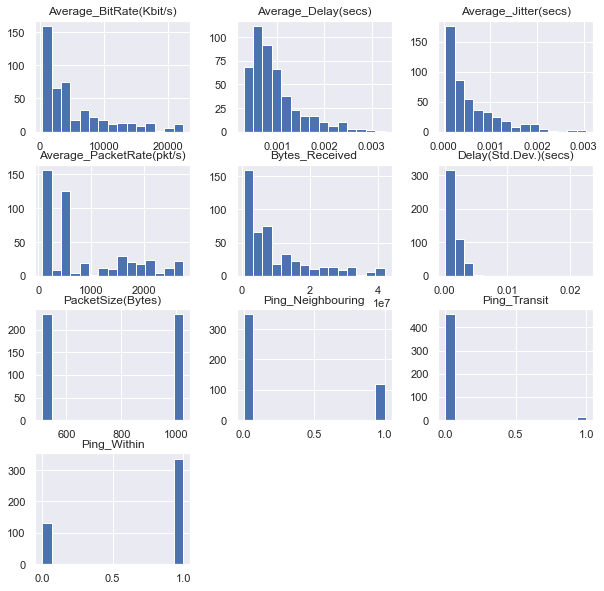

In [58]:
hist= x.hist(bins=15, figsize=(10,10))

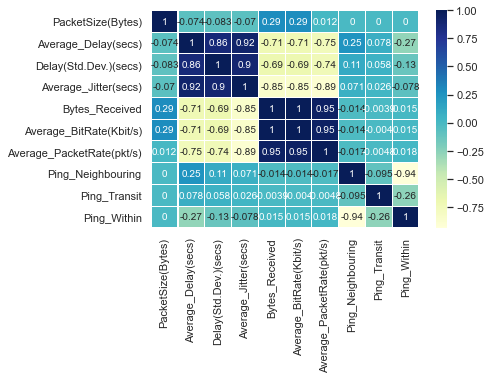

In [59]:
%matplotlib inline
sns.heatmap(x.corr(method="spearman"),linewidths=.1,cmap="YlGnBu", annot=True)


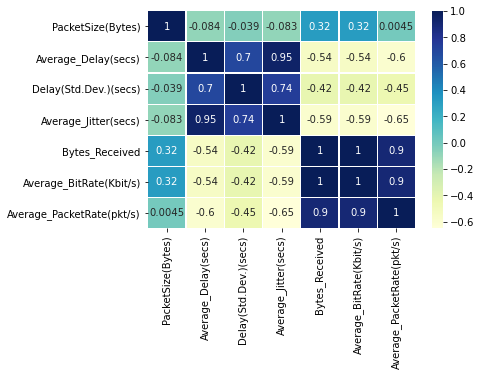

In [30]:
sns.heatmap(df.corr(method="pearson"),linewidths=.1,cmap="YlGnBu", annot=True)


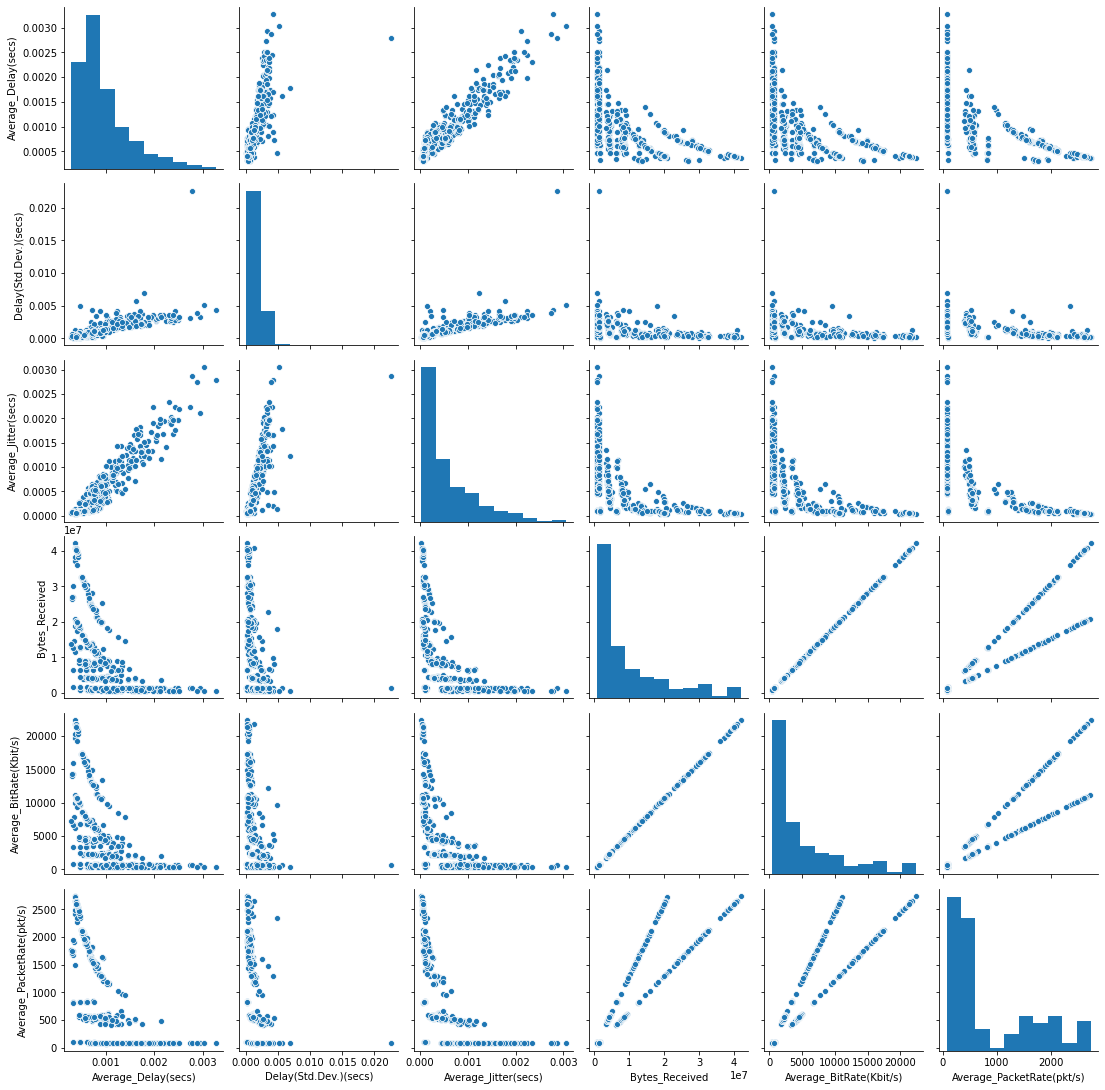

In [19]:
sns.pairplot(df)

In [48]:
x

,PacketSize(Bytes),Average_Delay(secs),Delay(Std.Dev.)(secs),Average_Jitter(secs),Bytes_Received,Average_BitRate(Kbit/s),Average_PacketRate(pkt/s),Ping_Neighbouring,Ping_Transit,Ping_Within
0,512,0.001737,0.001967,0.001218,674816,360.167094,87.931419,0,1,0
1,512,0.001172,0.002156,0.000945,662016,353.113242,86.209288,1,0,0
2,512,0.001745,0.002093,0.001096,671744,358.429467,87.507194,1,0,0
3,512,0.001457,0.003101,0.001040,668672,356.797447,87.108752,1,0,0
4,512,0.001192,0.001711,0.000849,664064,354.329112,86.506131,1,0,0
...,...,...,...,...,...,...,...,...,...,...
463,1024,0.001480,0.001806,0.000979,1329152,708.398836,86.474467,0,0,1
464,1024,0.000582,0.000739,0.000249,8175616,4361.107427,532.361746,0,0,1
465,1024,0.000768,0.001091,0.000325,8404992,4485.887155,547.593647,0,0,1
466,1024,0.000396,0.000232,0.000051,40029184,21349.803370,2606.177169,0,0,1


In [50]:
scaler = MinMaxScaler()
x = df.iloc[:,1:]
y = scaler.fit_transform(x)
y

ValueError: could not convert string to float: 'Transit'

In [38]:
test_data = pd.DataFrame(data=y[:,:],columns=columns)

In [39]:
test_data

,PacketSize(Bytes),Average_Delay(secs),Delay(Std.Dev.)(secs),Average_Jitter(secs),Bytes_Received,Average_BitRate(Kbit/s),Average_PacketRate(pkt/s),SourceIPaddress_10.0.10.101,SourceIPaddress_10.0.10.22,SourceIPaddress_10.0.10.23,...,DestinationIPaddress_10.100.100.2,DestinationIPaddress_10.100.200.2,DestinationIPaddress_192.168.1.101,DestinationIPaddress_192.168.1.22,DestinationIPaddress_192.168.1.23,DestinationIPaddress_192.168.3.10,DestinationIPaddress_192.168.4.10,Ping_Neighbouring,Ping_Transit,Ping_Within
0,0.0,0.484196,0.083111,0.393058,0.001595,0.001621,0.005325,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.294217,0.091515,0.302810,0.001286,0.001302,0.004678,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.486886,0.088714,0.352727,0.001521,0.001543,0.005165,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.390047,0.133538,0.334215,0.001446,0.001469,0.005015,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.300941,0.071727,0.271074,0.001335,0.001357,0.004789,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1.0,0.397781,0.075952,0.314050,0.017394,0.017387,0.004777,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
464,1.0,0.095831,0.028504,0.072727,0.182707,0.182752,0.172265,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
465,1.0,0.158373,0.044157,0.097851,0.188246,0.188401,0.177986,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
466,1.0,0.033289,0.005959,0.007273,0.951835,0.951865,0.951248,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
cols = test_data.columns.tolist()
cols

['PacketSize(Bytes)',
 'Average_Delay(secs)',
 'Delay(Std.Dev.)(secs)',
 'Average_Jitter(secs)',
 'Bytes_Received',
 'Average_BitRate(Kbit/s)',
 'Average_PacketRate(pkt/s)',
 'SourceIPaddress_10.0.10.101',
 'SourceIPaddress_10.0.10.22',
 'SourceIPaddress_10.0.10.23',
 'SourceIPaddress_10.100.100.2',
 'SourceIPaddress_10.100.200.2',
 'SourceIPaddress_192.168.1.101',
 'SourceIPaddress_192.168.1.22',
 'SourceIPaddress_192.168.1.23',
 'SourceIPaddress_192.168.3.10',
 'SourceIPaddress_192.168.4.10',
 'DestinationIPaddress_10.0.10.101',
 'DestinationIPaddress_10.0.10.22',
 'DestinationIPaddress_10.0.10.23',
 'DestinationIPaddress_10.100.100.2',
 'DestinationIPaddress_10.100.200.2',
 'DestinationIPaddress_192.168.1.101',
 'DestinationIPaddress_192.168.1.22',
 'DestinationIPaddress_192.168.1.23',
 'DestinationIPaddress_192.168.3.10',
 'DestinationIPaddress_192.168.4.10',
 'Ping_Neighbouring',
 'Ping_Transit',
 'Ping_Within']

In [42]:
cols = [cols[0]] + cols[2:]+[cols[1]]
cols

['PacketSize(Bytes)',
 'Delay(Std.Dev.)(secs)',
 'Average_Jitter(secs)',
 'Bytes_Received',
 'Average_BitRate(Kbit/s)',
 'Average_PacketRate(pkt/s)',
 'SourceIPaddress_10.0.10.101',
 'SourceIPaddress_10.0.10.22',
 'SourceIPaddress_10.0.10.23',
 'SourceIPaddress_10.100.100.2',
 'SourceIPaddress_10.100.200.2',
 'SourceIPaddress_192.168.1.101',
 'SourceIPaddress_192.168.1.22',
 'SourceIPaddress_192.168.1.23',
 'SourceIPaddress_192.168.3.10',
 'SourceIPaddress_192.168.4.10',
 'DestinationIPaddress_10.0.10.101',
 'DestinationIPaddress_10.0.10.22',
 'DestinationIPaddress_10.0.10.23',
 'DestinationIPaddress_10.100.100.2',
 'DestinationIPaddress_10.100.200.2',
 'DestinationIPaddress_192.168.1.101',
 'DestinationIPaddress_192.168.1.22',
 'DestinationIPaddress_192.168.1.23',
 'DestinationIPaddress_192.168.3.10',
 'DestinationIPaddress_192.168.4.10',
 'Ping_Neighbouring',
 'Ping_Transit',
 'Ping_Within',
 'Average_Delay(secs)']

In [115]:
testdata = test_data[cols]
testdata

,PacketSize(Bytes),Delay(Std.Dev.)(secs),Average_Jitter(secs),Bytes_Received,Average_BitRate(Kbit/s),Average_PacketRate(pkt/s),SourceIPaddress_10.0.10.101,SourceIPaddress_10.0.10.22,SourceIPaddress_10.0.10.23,SourceIPaddress_10.100.100.2,...,DestinationIPaddress_10.100.200.2,DestinationIPaddress_192.168.1.101,DestinationIPaddress_192.168.1.22,DestinationIPaddress_192.168.1.23,DestinationIPaddress_192.168.3.10,DestinationIPaddress_192.168.4.10,Ping_Neighbouring,Ping_Transit,Ping_Within,Average_Delay(secs)
0,0.0,0.083111,0.393058,0.001595,0.001621,0.005325,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.484196
1,0.0,0.091515,0.302810,0.001286,0.001302,0.004678,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.294217
2,0.0,0.088714,0.352727,0.001521,0.001543,0.005165,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.486886
3,0.0,0.133538,0.334215,0.001446,0.001469,0.005015,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.390047
4,0.0,0.071727,0.271074,0.001335,0.001357,0.004789,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.300941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1.0,0.075952,0.314050,0.017394,0.017387,0.004777,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.397781
464,1.0,0.028504,0.072727,0.182707,0.182752,0.172265,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.095831
465,1.0,0.044157,0.097851,0.188246,0.188401,0.177986,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.158373
466,1.0,0.005959,0.007273,0.951835,0.951865,0.951248,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.033289


In [54]:
df.head()

,PacketSize(Bytes),Average_Delay(secs),Delay(Std.Dev.)(secs),Average_Jitter(secs),Bytes_Received,Average_BitRate(Kbit/s),Average_PacketRate(pkt/s),SourceIPaddress_10.0.10.101,SourceIPaddress_10.0.10.22,SourceIPaddress_10.0.10.23,...,DestinationIPaddress_10.100.100.2,DestinationIPaddress_10.100.200.2,DestinationIPaddress_192.168.1.101,DestinationIPaddress_192.168.1.22,DestinationIPaddress_192.168.1.23,DestinationIPaddress_192.168.3.10,DestinationIPaddress_192.168.4.10,Ping_Neighbouring,Ping_Transit,Ping_Within
0,512,0.001737,0.001967,0.001218,674816,360.167094,87.931419,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,512,0.001172,0.002156,0.000945,662016,353.113242,86.209288,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,512,0.001745,0.002093,0.001096,671744,358.429467,87.507194,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,512,0.001457,0.003101,0.001040,668672,356.797447,87.108752,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,512,0.001192,0.001711,0.000849,664064,354.329112,86.506131,0,0,0,...,0,0,0,0,0,0,0,1,0,0


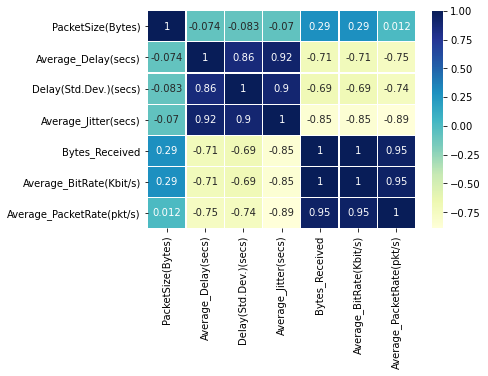

In [4]:
%matplotlib inline
sns.heatmap(df.corr(method="spearman"),linewidths=.1,cmap="YlGnBu", annot=True)


In [44]:
import arff
arff.dump('sdnfile.arff'
      , testdata.values
      , names=testdata.columns)

In [97]:
df['PacketSize(Bytes)']


0       512
1       512
2       512
3       512
4       512
       ... 
463    1024
464    1024
465    1024
466    1024
467    1024
Name: PacketSize(Bytes), Length: 468, dtype: int64

In [102]:
feature_cols = cols[2:6]
Y = testdata['Average_Delay(secs)']
X = pd.concat([testdata[feature_cols],df['PacketSize(Bytes)']],axis=1)
X

,Average_Jitter(secs),Bytes_Received,Average_BitRate(Kbit/s),Average_PacketRate(pkt/s),PacketSize(Bytes)
0,0.393058,0.001595,0.001621,0.005325,512
1,0.302810,0.001286,0.001302,0.004678,512
2,0.352727,0.001521,0.001543,0.005165,512
3,0.334215,0.001446,0.001469,0.005015,512
4,0.271074,0.001335,0.001357,0.004789,512
...,...,...,...,...,...
463,0.314050,0.017394,0.017387,0.004777,1024
464,0.072727,0.182707,0.182752,0.172265,1024
465,0.097851,0.188246,0.188401,0.177986,1024
466,0.007273,0.951835,0.951865,0.951248,1024


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [104]:
reg = DecisionTreeRegressor()
reg = reg.fit(X_train,Y_train)

In [105]:
y_pred = reg.predict(X_test)
print("Accuracy:",metrics.explained_variance_score(Y_test, y_pred))


Accuracy: 0.8795762585369136


In [114]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)  

0.8795462062482586